In [49]:
%load_ext autoreload
%autoreload 2

import numpy as np

from phLigands.DataFrame import read_file
from phLigands.Estimator import Estimator

from phLigands.Extremizer import CoordEx
from phLigands.Extremizer import Gradient
from phLigands.Metric import Dist2cobyla
from phLigands.Metric import Dist2
from phLigands.Metric import Diff2
from phLigands.Metric import R2
from phLigands.Metric import Y2
from phLigands.Model import LinReg
from phLigands.Model import ScatchardN
from phLigands.Model import MGvH
# from phLigands.Model import ModelsSymPy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


DEBUG:Extremizer:Gradient: {'k': 31081.208427076486, 'n': -7840.550326727679}
DEBUG:Extremizer:Gradient: {'k': 31081.208427076486, 'n': -7840.550326727679}
DEBUG:Extremizer:Iter 0: {'Ab': 191, 'k': 0.075001, 'n': 2.06} Score: 5069.921863207297
DEBUG:Extremizer:Step: [0.004998999999999999, -0.05999999999999999]
DEBUG:Extremizer:Gradient: {'k': 32649.218877941163, 'n': -7022.215427696209}
DEBUG:Extremizer:Iter 1: {'Ab': 191, 'k': 0.06974980632283768, 'n': 2.113737672497999} Score: 4534.2131236596
DEBUG:Extremizer:Step: [0.0052511936771623075, -0.053737672497999184]
DEBUG:Extremizer:Gradient: {'k': 34750.139711195516, 'n': -6343.2338661186795}
DEBUG:Extremizer:Iter 2: {'Ab': 191, 'k': 0.06416070740398956, 'n': 2.162279422261369} Score: 4039.068120454203
DEBUG:Extremizer:Step: [0.005589098918848124, -0.0485417497633696]
DEBUG:Extremizer:Gradient: {'k': 37509.503834598945, 'n': -5749.093318854647}
DEBUG:Extremizer:Iter 3: {'Ab': 191, 'k': 0.05812780137624933, 'n': 2.206274497193213} Score: 

Best params:  {'Ab': 191, 'k': 0.015342763102673247, 'n': 2.5639793976565417}
Score:  360.85842741841043




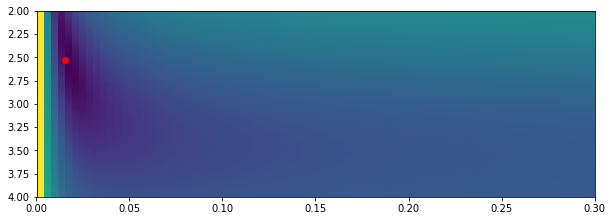

Real minimum: {"k": 0.015, "n": 2.532}, Score: 359.53


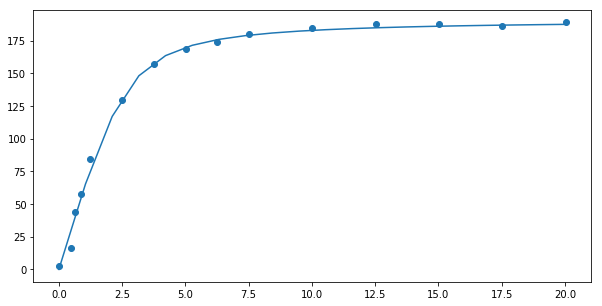

In [177]:
import logging
logger = logging.getLogger("Extremizer")
logger.setLevel(logging.DEBUG)

data = read_file("data/modelligand", names=["PD", "A"])
dataX, dataY = data["PD"], data["A"]

def_params = {
#     "c": 41, 
#     "Af": 0, 
    "Ab": 191, 
    "k": 0.08, 
    "n": 2,
}
extrem_params = {
#     "Ab": (190., 205.), 
    "k": (0.0001, 0.5), 
    "n": (2., 8.),
}
plot_params = {
    "k": (0.0001, 0.3), 
    "n": (2.,4.),
}

exp1 = Estimator(Gradient(precision=0.0005), Y2(), ScatchardN())
exp1.fit(dataX, dataY)
print("Best params: ", exp1.bestParams(def_params, extrem_params))
print("Score: ", exp1.score())
print("\n")
exp1.plotAB(plot_params, iters=80, log=True)

exp1.plot()

In [129]:
params = {
#     "c": 41, 
#     "Af": 0, 
    "Ab": 188.9, 
    "k": 0.01729114, 
    "n": 2.55696203,
}
exp1.score(params)

391.77109532321674